In [52]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import load_boston

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - x_mean)/x_std
x_test_scaled = (x_test - x_mean)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [53]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run
interc = np.ones((x_train_scaled.shape[0], 1))
x_train_scaled = np.hstack((interc, x_train_scaled))
interc = np.ones((x_test_scaled.shape[0], 1))
x_test_scaled = np.hstack((interc, x_test_scaled))

print(x_train_scaled.shape[1])
print(x_test_scaled.shape)

# init parameters using random values
theta = np.random.normal(0,0.5,x_train_scaled.shape[1])
print(theta.shape)
print(theta)

14
(102, 14)
(14,)
[-0.26271102  0.14499624 -0.56350649  0.700934    0.32039372  0.02933325
  0.77883727  0.4616171   0.2350915   0.27199441 -0.24212492 -0.65776091
 -0.64682014  0.32109272]


In [54]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    return np.matmul(x.T,(np.matmul(x,theta)-y))/(y.shape[0])

def compute_cost(x,y,theta):
    return np.matmul((np.matmul(x,theta)-y).T,(np.matmul(x,theta)-y))/(2*y.shape[0])

In [55]:
# Step 4: Verify the gradient value
# In this step, you need to verify that the computed gradient is correct. The difference betweet the gradient and the
# approximate gradient should be very small (~10^-18)
def approximate_gradient(x,y,theta,epsilon):
    n_features = x.shape[1]
    app_grad = np.zeros(n_features)
    for i in range(n_features):
        theta1 = theta.copy()
        theta2 = theta.copy()
        theta1[i] = theta[i]+epsilon
        theta2[i] = theta[i]-epsilon
        app_grad[i] = (compute_cost(x,y,theta1)-compute_cost(x,y,theta2))/(2*epsilon)
    return app_grad

grad = compute_gradient(x_train_scaled,y_train,theta)
epsilon = 1e-4
app_grad = approximate_gradient(x_train_scaled,y_train,theta,epsilon)
print('Sum of gradient squared error: ',np.sum((grad - app_grad)**2))

Sum of gradient squared error:  1.80682661782e-18


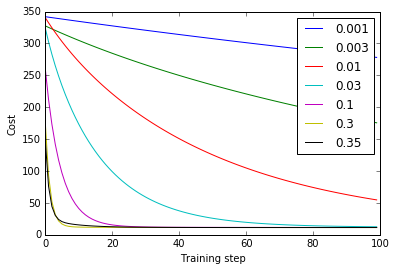

In [56]:
# Step 5: Try gradient descent algorithm with different learning rates
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rates = [0.001,0.003,0.01,0.03,0.1,0.3,0.35]

# this matrix keeps the learned parameters
theta_matrix = np.zeros((len(learning_rates),x_train_scaled.shape[1]))

# number of training iterations
N_iterations = 100

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
for indx,alpha in enumerate(learning_rates):
    # keep the cost value for each training step
    J = np.zeros(N_iterations)
    
    # initialize new parameters using random distribution
    theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
    for step in range(N_iterations):
        # update theta
        theta = theta - alpha*compute_gradient(x_train_scaled,y_train,theta)
        
        # save the value of theta
        theta_matrix[indx,:] = theta
        
        # calculate the cost on traing set
        J[step] = compute_cost(x_train_scaled,y_train,theta)
    # plot cost function
    plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.legend(('0.001','0.003','0.01','0.03','0.1','0.3','0.35'), loc='upper right')
plt.show()

test cost:  16.2743599794


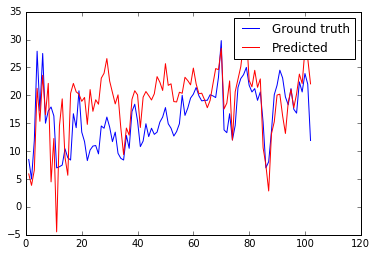

In [36]:
# Step 6: Predict the price of house
# You have to select the best theta you found
theta = theta_matrix[-1,:]
predict_price = np.matmul(x_test_scaled, theta)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled,y_test,theta)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()